# Group 39 Project Report

## *Tennis Win Rate Prediction*

**Introduction:** The Association of Tennis Professionals (ATP) is the sport governing body of tennis for men’s professional tennis competitions in the world. Statistics of all matches in the ATP competitions are recorded annually including the match location, match draw size, player’s statistics etc. 

<img src="download.png" width = "200"/>

Our target dataset of interest is the list of ATP tennis matches from the year 2022 in the world. Since many factors - age or height can determine the prospect of a player’s match win or loss, our analysis aims to study all the players' statistics to predict the win-loss probability of a tennis player from 2022. Our current dataset involves a list of player results from 2022, where sex is a constant variable that is not a relevant factor, while environmental factors such as previous training conditions and experience, cannot be accurately measured to be utilized in the analysis. As a result, we can only assess the results of tennis matches in 2022 based on age and height. Given that age and height are significant factors that affect motor performance and are often used as sport performance metrics, we can infer that a tennis player's rate of winning may be highly correlated to age and height. Therefore, through this project, we will be answering the question: 

*Within the year 2022, how likely will a player win against other tennis players in the world given the target player's age and height?*

## Methods & Results

### Installing Necessary Packages:

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(cowplot)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

### Loading Data from the original source

Below are two ways to view data from the web, from is directly reading from the csv, the other is downloading it first then viewing. 
For our data wrangling, we will be using the tennis_data, where the data is downloaded and then read (the TA mentioned this was fine for our purposes). 

In [2]:
url <- "https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2022.csv"

#Reading Data from the Web -> To show that our data can be read directly from the web
web_tennis_data <- read_csv(url)
glimpse(web_tennis_data)

#Downloading the data from the web to view it
destfile <- "data/atp_matches_2022.csv"
download.file(url, destfile)
tennis_data <- read_csv("data/atp_matches_2022.csv")
title <- "Table 1: 2022 Tennis Data Mathces (Untidy)" # We should do this for all our tables
cat("\n", title, "\n")
tennis_data

Rows: 2917 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 2,917
Columns: 49
$ tourney_id         <chr> "2022-8888", "2022-8888", "2022-8888", "2022-8888",…
$ tourney_name       <chr> "Atp Cup", "Atp Cup", "Atp Cup", "Atp Cup", "Atp Cu…
$ surface            <chr> "Hard", "Hard", "Hard", "Hard", "Hard", "Hard", "Ha…
$ draw_size          <dbl> 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,…
$ tourney_level      <chr> "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "…
$ tourney_date       <dbl> 20220103, 20220103, 20220103, 20220103, 20220103, 2…
$ match_num          <dbl> 300, 299, 298, 297, 296, 295, 294, 293, 292, 291, 2…
$ winner_id          <dbl> 200000, 133430, 105138, 105807, 106421, 133430, 134…
$ winner_seed        <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ winner_entry       <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ winner_name        <chr> "Felix Auger Aliassime", "Denis Shapovalov", "Rober…
$ winner_hand        <chr> "R", "L", "R", "R", "R", "L", "R", "R", "R", "R", "…
$ winner_ht     

Rows: 2917 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



 Table 1: 2022 Tennis Data Mathces (Untidy) 


tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022-8888,Atp Cup,Hard,16,A,20220103,300,200000,NA,NA,⋯,50,32,7,10,3,5,11,3308,19,2260
2022-8888,Atp Cup,Hard,16,A,20220103,299,133430,NA,NA,⋯,33,21,8,9,3,6,14,2475,20,2230
2022-8888,Atp Cup,Hard,16,A,20220103,298,105138,NA,NA,⋯,80,62,20,16,6,7,19,2260,9,3706
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2022-M-DC-2022-WG2-PO-HKG-BEN-01,Davis Cup WG2 PO: HKG vs BEN,Hard,4,D,20220304,1,138846,NA,NA,⋯,54,29,8,11,6,10,1059,10,1881,1
2022-M-DC-2022-WG2-PO-HKG-BEN-01,Davis Cup WG2 PO: HKG vs BEN,Hard,4,D,20220304,2,209409,NA,NA,⋯,39,24,7,10,5,9,1050,10,NA,NA
2022-M-DC-2022-WG2-PO-HKG-BEN-01,Davis Cup WG2 PO: HKG vs BEN,Hard,4,D,20220304,4,208414,NA,NA,⋯,34,24,13,10,5,8,NA,NA,NA,NA


### Data Wrangling:

* __First, we must create a new data set with the players that have won their match:__
    - We do this by using `select` to select columns of just the winners, then renamed the columns.
    - Finally, by using `mutate`, we create a new column named "results" that simply states "win".
* __Now, we repeat step one, but this time for players that have lost their match and with results stating "lose".__
* __Then, we create our tidy data frame through these steps:__
    - First, we use the `rbind` function to combine the two dataframes into one.
    - Then, we filter out the NA/Missing data values.
    - Using `mutate`, we first used `as_factor` to turn the character values of results into factors then we used `as.numeric` to convert the factors into numbers, which turned “win” into 1 and “lose” into 2. Since we want the range to be from 0 to 1, we used `mutate` to subtract the values by 1 turning “win” into 0 and “lose” into 1.
    - We then group by name and height to summarize the rate of losing by taking the average of the results as well as calculating the mean age by taking the average of the ages.
    - Then, we ungroup the data so that we are able to filter out players that have played less than 5 matches in 2022 (to filter out outliers in the data).
    - We know that "1 - rate_of_losing" is simply just the `rate_of_winning`, so we use `mutate` to create that.
    - Finally, we get rid of unncessary columns, which in our case is `rate_of_losing` and `matches_played`, for we aren't planning to focus on it for our regression purposes.

`summarise()` has grouped output by 'name'. You can override using the
`.groups` argument.



 Table 2: Height, Age, and Rate of Winning per Player in Tidy Data  


name,ht,mean_age,rate_of_winning
<chr>,<dbl>,<dbl>,<dbl>
Adrian Mannarino,183,33.87037,0.5185185
Albert Ramos,188,34.31923,0.4807692
Alejandro Davidovich Fokina,183,22.91277,0.4468085
⋮,⋮,⋮,⋮
Yosuke Watanuki,180,24.04286,0.4285714
Zhizhen Zhang,193,25.92222,0.5555556
Zizou Bergs,185,22.95714,0.1428571


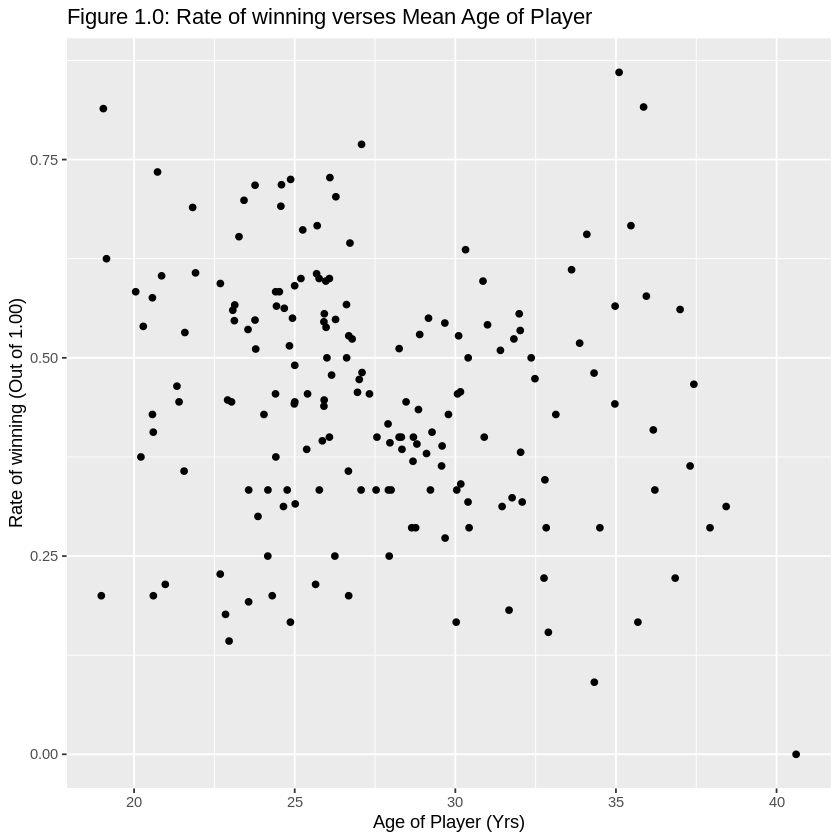

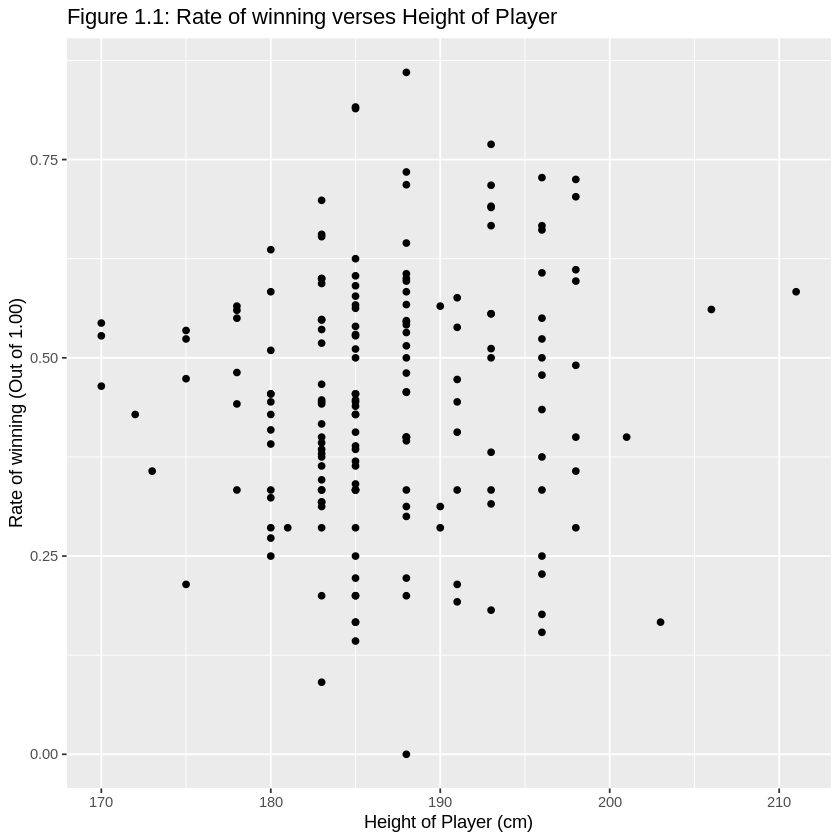

In [3]:
player_stats_winners<-tennis_data|> select(winner_age, winner_ht, winner_name)|>
    rename(
    age = winner_age,
    ht = winner_ht,
    name = winner_name)|>
    mutate(results = "win")


player_stats_losers<- tennis_data |> 
    select(loser_age, loser_ht, loser_name)|>
    rename(
    age = loser_age,
    ht = loser_ht,
    name = loser_name)|>
    mutate(results = "lose") 


player_stats <- rbind(player_stats_winners, player_stats_losers)|>
    filter(age!="NA", ht!="NA")|>
    mutate(results = as_factor(results))|>
    mutate(results = as.numeric(results))|>
    mutate(results = results-1)|>
    group_by(name, ht)|>           
    summarize(rate_of_losing=mean(results), mean_age=mean(age), matches_played = n())|>
    ungroup() |>
    filter(matches_played >= 5) |>
    mutate(rate_of_winning = 1 - rate_of_losing) |>
    select(-rate_of_losing, -matches_played)

title <- "Table 2: Height, Age, and Rate of Winning per Player in Tidy Data " 
cat("\n", title, "\n")
player_stats

age_graph_unscaled <- ggplot(player_stats, aes(x=mean_age, y=rate_of_winning)) +
    geom_point()+
    labs(x="Age of Player (Yrs)", y="Rate of winning (Out of 1.00)", title="Figure 1.0: Rate of winning verses Mean Age of Player")

ht_graph_unscaled <- ggplot(player_stats, aes(x=ht, y=rate_of_winning)) +
    geom_point()+
    labs(x="Height of Player (cm)", y="Rate of winning (Out of 1.00)", title="Figure 1.1: Rate of winning verses Height of Player")
age_graph_unscaled
ht_graph_unscaled

### Splitting Data
We split our data into training(70%) and testing(30%). Also, we set seed for reproducibility when we use any randomizing function.

In [4]:
set.seed(1234)
player_stats_split <- initial_split(player_stats, prop = 0.7, strata = rate_of_winning)
player_stats_training <- training(player_stats_split)
player_stats_testing <- testing(player_stats_split)
title <- "Table 3: Player Stats Training Data" # We should do this for all our tables
cat("\n", title, "\n")
player_stats_training
title <- "Table 4: Player Stats Testing Data" # We should do this for all our tables
cat("\n", title, "\n")
player_stats_testing


 Table 3: Player Stats Training Data 


name,ht,mean_age,rate_of_winning
<chr>,<dbl>,<dbl>,<dbl>
Aljaz Bedene,181,32.82857,0.2857143
Andreas Seppi,190,37.92857,0.2857143
Benoit Paire,196,32.89615,0.1538462
⋮,⋮,⋮,⋮
Taylor Fritz,193,24.56912,0.6911765
Tim Van Rijthoven,188,25.19333,0.6000000
Tommy Paul,185,24.99848,0.5909091



 Table 4: Player Stats Testing Data 


name,ht,mean_age,rate_of_winning
<chr>,<dbl>,<dbl>,<dbl>
Alejandro Davidovich Fokina,183,22.91277,0.4468085
Alejandro Tabilo,188,24.83636,0.5151515
Alex De Minaur,183,23.26528,0.6527778
⋮,⋮,⋮,⋮
Thanasi Kokkinakis,196,26.00294,0.5000000
Thiago Monteiro,183,27.90556,0.4166667
Ugo Humbert,188,23.85667,0.3000000


A pairplot of our variables to see their relationships on the training data (Using the `ggpairs()` function introduced tutorial regression 2).


 Table 5: Dataset for Pairplot 


ht,mean_age,rate_of_winning
<dbl>,<dbl>,<dbl>
181,32.82857,0.2857143
190,37.92857,0.2857143
196,32.89615,0.1538462
⋮,⋮,⋮
193,24.56912,0.6911765
188,25.19333,0.6000000
185,24.99848,0.5909091


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


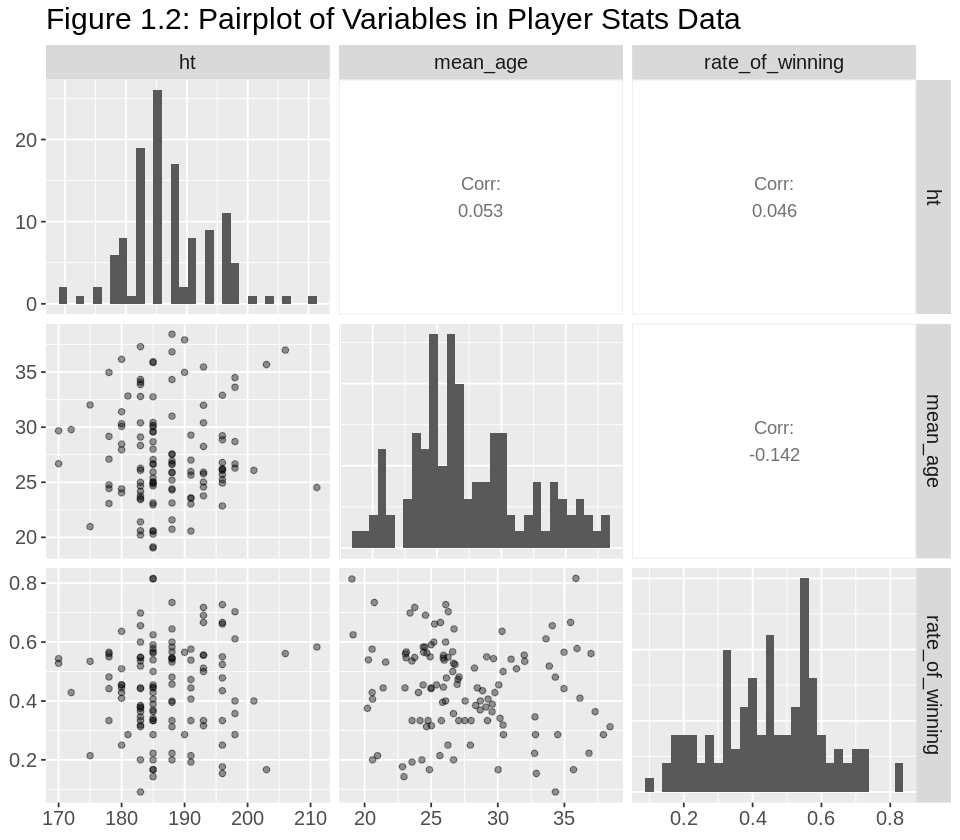

In [5]:
options(repr.plot.width = 8, repr.plot.height = 7)
player_stats_training_no_names <- player_stats_training |>
                        ungroup() |>
                        select(-name)
title <- "Table 5: Dataset for Pairplot" # We should do this for all our tables
cat("\n", title, "\n")
player_stats_training_no_names

player_pairplot <- player_stats_training_no_names |> 
    ggpairs(
        lower = list(continuous = wrap('points', alpha = 0.4)),
        diag = list(continuous = "barDiag")
    ) +
    theme(text = element_text(size = 15)) + 
    ggtitle("Figure 1.2: Pairplot of Variables in Player Stats Data")

player_pairplot

Now, we calculate the means of the parameters, `mean_age` and `ht`, to check if will need to standardize our data. We will need to ungroup our data for this analysis.

In [6]:
train_stats <- player_stats_training|>
    ungroup() |>
    summarize(age_mean = mean(mean_age),
              ht_mean = mean(ht),
              age_sd = sd(mean_age),
              ht_sd = sd(ht)) |>
              pivot_longer(cols = age_mean:ht_sd,
                names_to = "statistic",
                values_to = "value")
                            
#Set table title
title <- "Table 6: Means and Standard Deviations in Training Data" # We should do this for all our tables
cat("\n", title, "\n")

# Print the table
train_stats


 Table 6: Means and Standard Deviations in Training Data 


statistic,value
<chr>,<dbl>
age_mean,27.548714
ht_mean,187.157025
age_sd,4.566100
ht_sd,6.941431


### Summary of exploratory data analysis
We can see that the means and standard deviations between `mean_age` and `ht` have quite a big difference meaning we will need to standardize the data in our data analysis.

## Data Analysis

### Standardize parameters
We standardized the data by creating a recipe, `player_stats_recipe`, with `rate_of_winning` as our prediction variable, `ht` and `mean_age` as our predictors and `player_stats_training` as our data. Then we used `step_scale` and `step_center` on all predictors and prepped the recipe. We then created a table to look at the means and standard deviation of the scaled data.

In [7]:
set.seed(1234)
# Reminder what the means and SDs looked before standardization
title <- "Table 7: Means and Standard Deviations in Training Data"
cat("\n", title, "\n")

# Print the table
train_stats


# Standardizing the data
player_stats_recipe <- recipe(rate_of_winning ~ ht + mean_age, data = player_stats_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) |>
    prep()

scaled_data <- bake(player_stats_recipe, player_stats_training)

# A look at the means and SDs after standardization
standardized_stats <- scaled_data|>
    summarize(age_mean = mean(mean_age),
              ht_mean = mean(ht),
              age_sd = sd(mean_age),
              ht_sd = sd(ht)) |>
              pivot_longer(cols = age_mean:ht_sd,
                  names_to = "statistic",
                  values_to = "value")
#Set table title
title <- "Table 8: Means and Standard Deviations in Standardized Data"
cat("\n", title, "\n")

# Print the table
standardized_stats


 Table 7: Means and Standard Deviations in Training Data 


statistic,value
<chr>,<dbl>
age_mean,27.548714
ht_mean,187.157025
age_sd,4.566100
ht_sd,6.941431



 Table 8: Means and Standard Deviations in Standardized Data 


statistic,value
<chr>,<dbl>
age_mean,3.743669e-16
ht_mean,1.056963e-15
age_sd,1.000000e+00
ht_sd,1.000000e+00


The means of age and height are near zero and the standard deviations are both 1, meaning we have finished our standardization.

### Choosing K for KNN Regression and finding lowest RMSE
Here, we want to find the lowest RMSE for the KNN-regression model, and at the same time choosing the best number of neighbors to use. 
* First, we set up `player_stats_spec`, using `tune()` to find best neighbors, and set the mode as `"regression"`.
* Then we do V-Fold Cross Validation for KNN-Regression to determine the optimal number of neighbors (k), as it systematically evaluates how the choice of k affects the model's performance on unseen data. By training and testing the model across different subsets of the training dataset, cross-validation helps minimize both bias and variance, ensuring the selected k value generalizes well across different scenarios. This method avoids the risk of overfitting or underfitting, which is crucial given KNN's sensitivity to the choice of k.
* Then we want to choose the range of k-neighbors we want to use, we don't want to pick too much of a range, as it increases the time complexity of our model. (According to the TA, with vfold cross validation, we our model is running on O(nlogn) complexity, such that n is dependent on the amount of neighbors we give as input). As such, if we have a really wide range, (with a number of inputs close to the amount of the training data itself) we could get close to a O(n^2logn) time complexity instead, which we don't want, as we want to be efficient.
* Therefore, we try out different ranges to see which one is most time efficient, but also picking out the best number of neighbors with the lowest rmse. Note that we want to prioritize getting the lowest rmse and best number of neighbors over time complexity.
* After multiple trial and errors, we cap out at 89 neighbors having the lowest RMSE (Our range can only stretch to 91 for the upper bound, don't have enough data values to keep going). From the trials, we notice that everythign we increased the range by 10, starting from 10, the optimal number of neighbors kept increasing and the RMSE kept decreasing. Therefore, let's make the range from 81 - 91.
* Of course, we know a good range from testing several times, but normally doing it just the first time, it wouldn't be bad to do a common range from 1-20. The optimal number here is 19 with an RMSE of 0.1599646, which is 0.005 higher than the RMSE of 89 neighbors. Definitely not bad if you are doing it only once.
* To wrap it all up, we put everything in a workflow, the code cell after the next code cell presents the code on how we derive the optimal number of neighbors based on lowest RMSE. 

In [8]:
set.seed(1234)
player_stats_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

player_stats_vfold <- vfold_cv(player_stats_training, v = 5, strata = rate_of_winning)

gridvals <- tibble(neighbors = seq(81, 91))

player_stats_results <- workflow() |> 
    add_recipe(player_stats_recipe) |> 
    add_model(player_stats_spec) |>
    tune_grid(resamples = player_stats_vfold, grid = gridvals) |> # if you use grid = 200, it will test for neighbours from 1:200 (same as gridvals in this case)
    collect_metrics()

title <- "Table 9: Dataframe Displaying Results of our KNN-regression tuning Model"
cat("\n", title, "\n")
player_stats_results


 Table 9: Dataframe Displaying Results of our KNN-regression tuning Model 


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
81,rmse,standard,0.15619854,5,0.003796581,Preprocessor1_Model01
81,rsq,standard,0.04495237,5,0.011971433,Preprocessor1_Model01
82,rmse,standard,0.15614885,5,0.003889077,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
90,rsq,standard,0.04100857,5,0.027817816,Preprocessor1_Model10
91,rmse,standard,0.15508314,5,0.004140731,Preprocessor1_Model11
91,rsq,standard,0.03893994,5,0.038000931,Preprocessor1_Model11


*This is where we actually find the most optimal number of neighbors and lowest RMSE. 

In [9]:
player_stats_min <- player_stats_results |>
   filter(.metric == "rmse") |>
   arrange(mean) |> 
   head(1)

title <- "Table 10: Dataframe Showing only the Lowest RMSE Row"
cat("\n", title, "\n")
player_stats_min


k_min <- player_stats_min |>
         pull(neighbors)

k_min #In case we decide to use KNN regression


 Table 10: Dataframe Showing only the Lowest RMSE Row 


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
89,rmse,standard,0.1549169,5,0.004173558,Preprocessor1_Model09


[1] 89

We can see that the optimal number of neighbors (as mentioned earlier) is 89 with a RMSE of 0.1549169. 

### Fitting a Linear Regression model
* Now that we found the lowest RMSE of our KNN regression model, it's time to try it out on the Linear Regression Model. 
* Similarly, we create a `lm_spec` for linear regression. 
* We create a new recipe as we do not standardize our predictors in linear regression because it does not impact the fit of the model or the predictive accuracy, given that the coefficients adjust accordingly.
* Another difference you might notice is that we do not use V-fold Cross-validations because linear regression has a stable, closed-form solution that isn't sensitive to variations in training data subsets, unlike models that rely on iterative tuning of something. Additionally, the simplicity and efficiency of linear regression, along with its low susceptibility to changes in model performance across different data splits, make it pointless for us to do V-fold Cross-validation. Also, the code is not provided on how to do V-fold cross-validations on linear regressions in the textbook or in the course, and the stack overflow question I saw about it, it didn't work :(. 
* Finally, we put everything in the workflow.

In [10]:
set.seed(1234)

# your code here
lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

player_stats_recipe <- recipe(rate_of_winning ~ mean_age + ht, data = player_stats_training)

player_stats_fit <- workflow() |>
  add_recipe(player_stats_recipe) |>
  add_model(lm_spec) |>
  fit(data = player_stats_training)

#### Finding RMSE value for Linear Regression 

In [11]:
lm_rmse <- player_stats_fit |>
        predict(player_stats_training) |>
        bind_cols(player_stats_training) |>
        metrics(truth = rate_of_winning, estimate = .pred) |>
        filter(.metric == "rmse") |>
        select(.estimate) |>
        pull()

# your code here
lm_rmse

[1] 0.1539307

### KNN vs. Linear Regression RMSE
We can see that the (Rounded up) RMSE of Linear Regression(0.1539307) is lower than KNN-regression(0.1549169), thus, we should use Linear Regression for our model. 

### Calculating RMSPE for Linear Regression
Now we use our Linear Regression model to predict on the testing data. We also get find and get the lowest RMSPE to see how accurate it is. 

In [12]:
player_stats_test_results <- player_stats_fit |>
  predict(player_stats_testing) |>
  bind_cols(player_stats_testing) |>
  metrics(truth = rate_of_winning, estimate = .pred)

title <- "Table 11: Metrics of our Linear Regression Model Predicting on the Testing Data"
cat("\n", title, "\n")
player_stats_test_results

#for just the rmpse value, but it's already shown in the tibble
lm_rmspe <- player_stats_test_results |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()

lm_rmspe


 Table 11: Metrics of our Linear Regression Model Predicting on the Testing Data 


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.15374696
rsq,standard,0.08824586
mae,standard,0.12049996


[1] 0.153747

We can see that the RMSPE is 0.1537470 which is slightly higher than the RMSE we got of 0.153930. *Note that all RMSE values have been rounded up.*

## Visualization
Now, let's create multiple graphs to see the relationship between our variables. 
* We will create 6 graphs, 3 for each relationship. The three graphs are different by the dataframe they are taking, which are the testing data, training data, and original tidy dataset.
* We used `options(...)` to set a good height and width for the graphs. The values are ideal for 13 inch monitors, which I thought it most popular amongst students and teachers at UBC.
* To make it easier to compare, we put the plots of each relationship together.

The first relationship that we focus on is between `age` and `rate_of_winning`.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


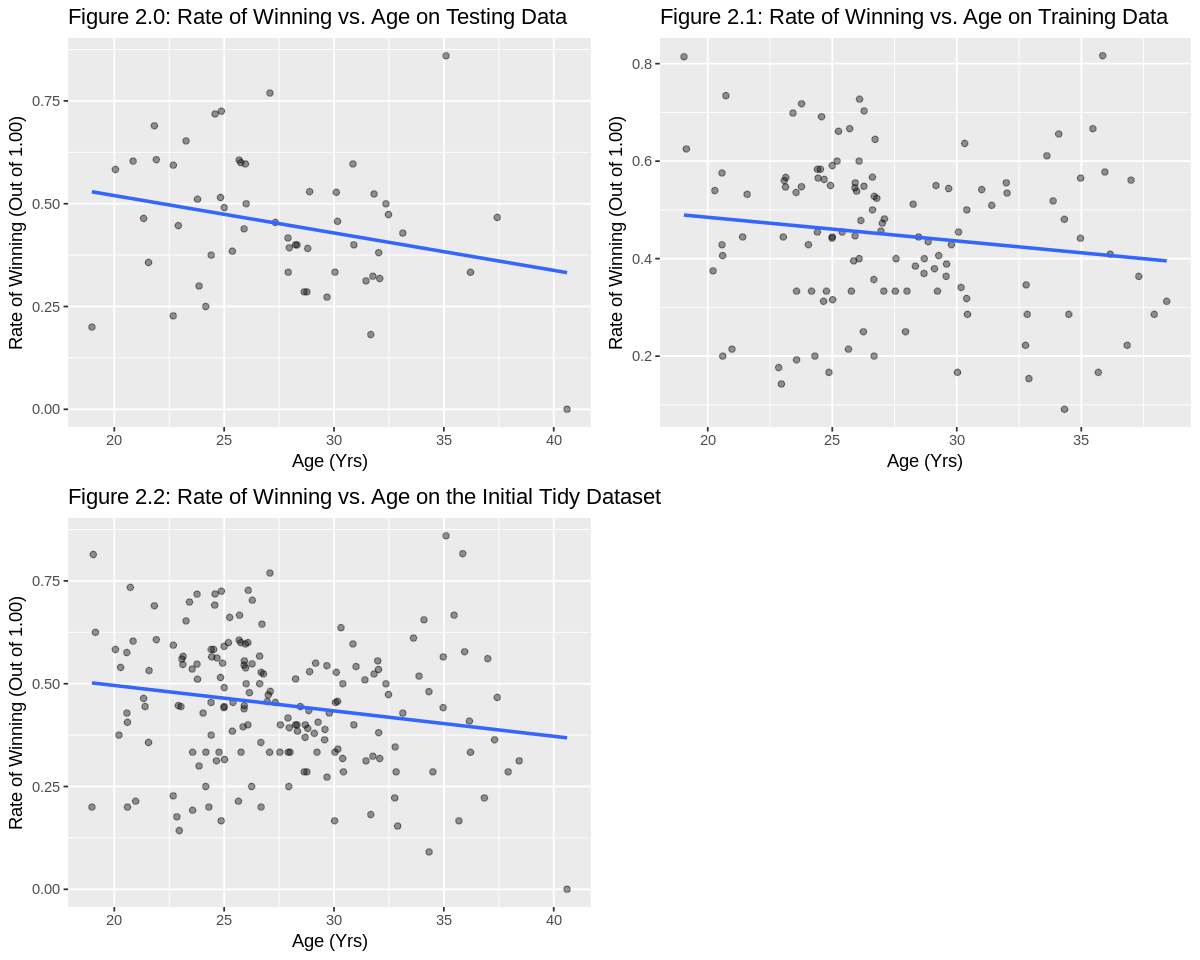

In [13]:
player_stats_testing1 <- ggplot(player_stats_testing, aes(x = mean_age, y = rate_of_winning)) +
  geom_point(alpha = 0.4) +
  xlab("Age (Yrs)") +
  ylab("Rate of Winning (Out of 1.00)") +
  geom_smooth(method = "lm", se = FALSE) +
  ggtitle("Figure 2.0: Rate of Winning vs. Age on Testing Data")

player_stats_training1 <- ggplot(player_stats_training, aes(x = mean_age, y = rate_of_winning)) +
  geom_point(alpha = 0.4) +
  xlab("Age (Yrs)") +
  ylab("Rate of Winning (Out of 1.00)") +
  geom_smooth(method = "lm", se = FALSE) +
  ggtitle("Figure 2.1: Rate of Winning vs. Age on Training Data")

player_stats_all1 <- ggplot(player_stats, aes(x = mean_age, y = rate_of_winning)) +
  geom_point(alpha = 0.4) +
  xlab("Age (Yrs)") +
  ylab("Rate of Winning (Out of 1.00)") +
  geom_smooth(method = "lm", se = FALSE) +
  ggtitle("Figure 2.2: Rate of Winning vs. Age on the Initial Tidy Dataset")

options(repr.plot.width = 10, repr.plot.height = 8)
combined_plot1 <- plot_grid(player_stats_testing1, player_stats_training1, player_stats_all1)
combined_plot1

Now we focus on the other relationship, between `height` and `rate_of_winning`.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


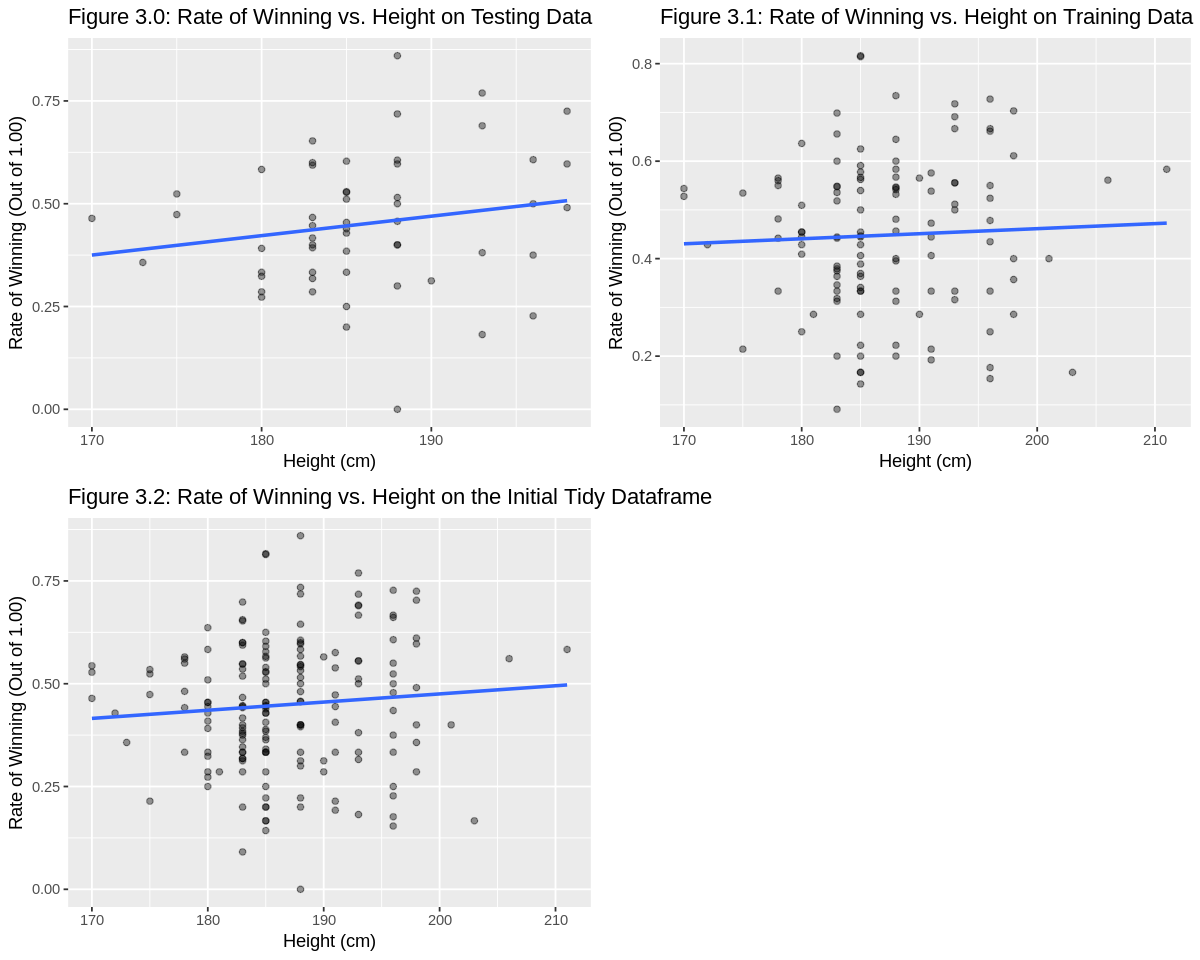

In [14]:
options(repr.plot.width = 10, repr.plot.height = 8)

player_stats_testing2 <- ggplot(player_stats_testing, aes(x = ht, y = rate_of_winning)) +
  geom_point(alpha = 0.4) +
  xlab("Height (cm)") +
  ylab("Rate of Winning (Out of 1.00)") +
  geom_smooth(method = "lm", se = FALSE) +
  ggtitle("Figure 3.0: Rate of Winning vs. Height on Testing Data")

player_stats_training2 <- ggplot(player_stats_training, aes(x = ht, y = rate_of_winning)) +
  geom_point(alpha = 0.4) +
  xlab("Height (cm)") +
  ylab("Rate of Winning (Out of 1.00)") +
  geom_smooth(method = "lm", se = FALSE) +
  ggtitle("Figure 3.1: Rate of Winning vs. Height on Training Data")

player_stats_all2 <- ggplot(player_stats, aes(x = ht, y = rate_of_winning)) +
  geom_point(alpha = 0.4) +
  xlab("Height (cm)") +
  ylab("Rate of Winning (Out of 1.00)") +
  geom_smooth(method = "lm", se = FALSE) +
  ggtitle("Figure 3.2: Rate of Winning vs. Height on the Initial Tidy Dataframe")

combined_plot2 <- plot_grid(player_stats_testing2, player_stats_training2, player_stats_all2)
combined_plot2

## Discussion

As it may be clearly seen from the updated visualizations, such relations exist between the age and height of a tennis player and the rate of winning in ATP tennis matches analyzed within the dataset of the year 2022. The findings of this study will provide a captivating conversation about the means by which these physical and demographic variables may interrelate among each other towards success in winning a match.

When plotted against the rate of winning over the age, it can be clear that this chart represents the trend of higher success rates for younger players and that the peak effectiveness could be in their 20s to early 30s. In the scatter plot, we observed a concentration of the number of wins in a cluster of data points around this age group, with different proportions of the winning rate. This means that age certainly matters, but it is moderated by other factors that have not been considered in this analysis.

The relation between height and winning is unclear, but it may show a trend of a larger stature winning at slightly higher rates. The visualization shows that the data points scatter at different heights; winning rates have a gentle increase trend when the heights increase. This could mean a portion of the individual feeds off a competitive advantage from greater height, though it would be relatively small.

Thus, in general, both graphs indicated general trends through linear models but with a considerable scatter of data points, suggesting significant variability that might be influenced by other factors such as player skill, experience, and definite match conditions besides height and age factors.

The findings from this study align relatively close to our expectations from previous research where age and height have been popular study metrics for athletic performance. In the previous research from Samson et al., (2000), muscle strength and power were shown to decline with greater age, suggesting that mobility fluidity would be less efficient for older athletes.

Given that our results show that a younger age and slightly greater heights would lead to increased rate of winning, this could lead to further questions such as what other factors may have an effect on the win rate of a player or does the current results from this apply to other data sets from other years of tennis matches, women’s tennis leagues, amateur level tennis matches, or other fields of athletic sports. Notably, in past research from Aikawa et al., (2020), body mass and muscle mass were significantly positively correlated with the competition scores.

The findings from this algorithm could impact the training method of a tennis player for optimization of that particular player’s performance. For example, the data could indicate the most optimal age and height to achieve as target metrics for future aspiring professional players. Overall, our analysis presents the findings that would suggest that age and height could be taken as variables affecting outcomes in tennis matches. However, there is not very strong or deterministc evidence.

## References

Data Source:
1. Jeff Sackmann, Tennis ATP, (2023), GitHub repository, https://github.com/JeffSackmann/tennis_atp 
https://doi.org/10.1093/ageing/29.3.235

Literature Reference: 
1. Aikawa, Y., Murata, M., & Omi, N. (2020). Relationship of height, body mass, muscle mass, fat mass, and the percentage of fat with athletic performance in male Japanese college sprinters, distance athletes, jumpers, throwers, and decathletes. The Journal of Physical Fitness and Sports Medicine, 9(1), 7–14. https://doi.org/10.7600/jpfsm.9.7
   
2. M M Samson, I B Meeuwsen, A Crowe, J A Dessens, S A Duursma, H J Verhaar, Relationships between physical performance measures, age, height and body weight in healthy adults., Age and Ageing, Volume 29, Issue 3, May 2000, Pages 235–242, https://doi.org/10.1093/ageing/29.3.235